In [9]:
import numpy as np
import pandas as pd
import os
from keras.preprocessing.image import ImageDataGenerator
import bcolz
import random
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from tqdm import tqdm

# print(os.listdir("../input"))

In [10]:
df_train = pd.read_csv('../input/labels.csv')

In [11]:
im_size=300
x_train = bcolz.zeros((0,im_size,im_size,3),np.float32)
y_train =[]

In [12]:
for i,j in tqdm(df_train.values):
    image = load_img('../input/train/{}.jpg'.format(i), target_size=(im_size, im_size))
    x_train.append(img_to_array(image))
    y_train.append(j)

100%|██████████| 10222/10222 [01:40<00:00, 101.67it/s]


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [14]:
batch_size=2
resize_factor=0.8

In [15]:
idx=np.arange(1,1023)
np.random.shuffle(idx)

In [16]:
def augmentation(X,Y,list_id,batch_size=2):
    datagen = ImageDataGenerator()
    temp = np.zeros((2,int(im_size*0.8),int(im_size*0.8),3),dtype=np.float32)
    temp1= np.zeros((2,int(im_size*0.8),int(im_size*0.8),3),dtype=np.float32)
    image_to_test = np.random.randint(0,1022)
    im=list_id[image_to_test*batch_size:(image_to_test+1)*batch_size]    
    def plotImages( images_arr, n_images=2):
        fig, axes = plt.subplots(n_images, figsize=(12,12))
        axes = axes.flatten()
        for img, ax in zip( images_arr, axes):
            ax.imshow(img)
            ax.set_xticks(())
            ax.set_yticks(())
        plt.tight_layout()
    for i,ids in enumerate(im):
        if random.randint(1,101)<20:
            print("Top Left Crop")
            temp[i]=X[ids,0:240,0:240,:]
        elif random.randint(1,101)<40:
            print("Bottom Left Crop")
            temp[i]=X[ids,60:300,0:240,:]
        elif random.randint(1,101)<60:
            print("Top Right Crop")
            temp[i]=X[ids,0:240,60:300,:]
        elif random.randint(1,101)<80:
            print("Bottom Right Crop")
            temp[i]=X[ids,60:300,60:300,:]
        else:
            print("Center Crop")
            temp[i]=X[ids,30:270,30:270,:]
        for k in range(2):   
            if random.randint(1,101) < 50: 
                flip_horizontal = True
            else:
                flip_horizontal = False
            if random.randint(1,101) < 50: 
                flip_vertical = True
            else:
                flip_vertical = False
            """tx = im_size*random.randint(1,10)/100.0
            ty = im_size*random.randint(1,10)/100.0
            shear = random.randint(1,10)/100.0
            zx = random.randint(80,120)/100.0
            zy = random.randint(80,120)/100.0
            brightness = random.randint(1,2)/100.0
            channel_shift_intensity = random.randint(1,10)/100.0"""
            
            temp1[k] = datagen.apply_transform(temp[i],{
                """'tx':tx,
                'ty':ty,
                'shear':shear,
                'zx':zx,
                'zy':zy,"""
                'flip_horizontal':flip_horizontal,
                'flip_vertical':flip_vertical
                
                #'brightness':brightness,
                #'channel_shift_intensity':channel_shift_intensity
                })
            plt.title(Y[ids])
            plt.imshow(X[ids,]/255.0)
        plotImages(temp1[:,]/255.0)

Top Right Crop
Top Right Crop


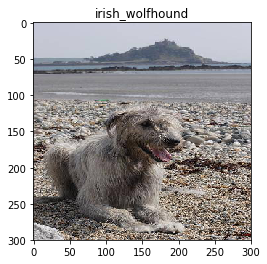

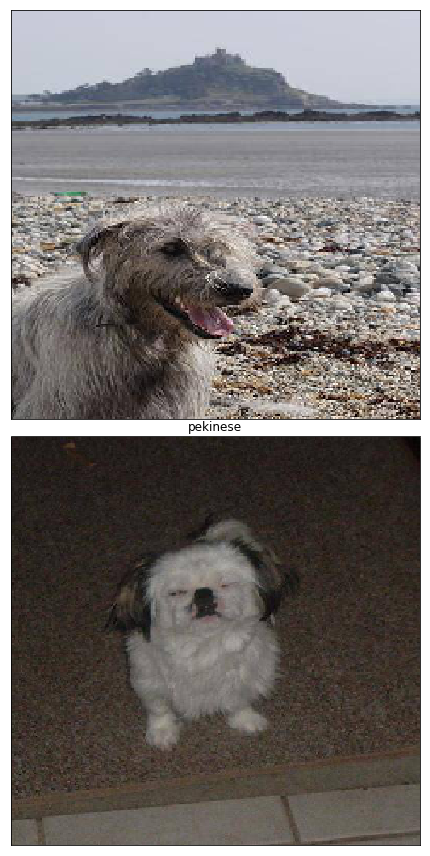

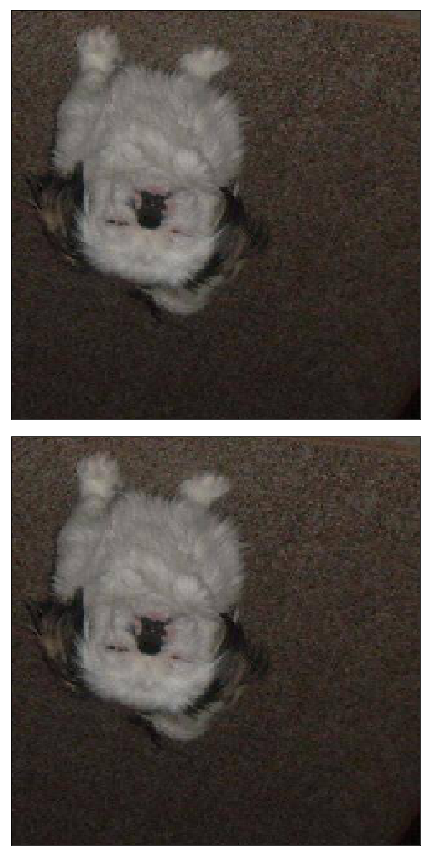

In [17]:
augmentation(x_train,y_train,idx)